<a href="https://colab.research.google.com/github/sangjin94/itwill-python/blob/main/ml06_multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다중 선형 회귀

특성(독립변수)이 여러개 인 선형 회귀 모델 
  * 1차항만 고려한 선형 회귀
  * 고차항들을 포함하는 선형 회귀
  * 규제(Regularization): overfitting(과대적합)을 줄이기 위한 기법

# Imports

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_squared_error

# 데이터 준비

In [113]:
# 데이터 셋 github URL
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [114]:
# DataFrame 생성
fish= pd.read_csv(fish_csv)

In [115]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


선형 회귀 목적: 농어(Perch)의 무게(Weight)를 농어의 다른 특성들(Length, Diagonal, Height,Width) 로 예측

Weight ~ Length + Diagonal + Height + Width

In [116]:
perch= fish[fish.Species=='Perch'] # 농어(Perch)만 선택
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [117]:
# 특성(features), 독립 변수
X =perch[['Length','Diagonal','Height','Width']].values

In [118]:
X.shape

(56, 4)

In [119]:
# label, target, 종속 변수
y= perch['Weight'].values

# train/test split

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.25,
                                               random_state=42)

In [121]:
X_train.shape,X_test.shape

((42, 4), (14, 4))

In [122]:
y_train.shape,y_test.shape

((42,), (14,))

# 1차항만 고려하는 선형 회귀 

$
\hat{y}= w_0 + w_1 \times x_1 + w_2 \times x_2 + w_3 \times x_3 + w_4 \times x_4
$

In [123]:
lin_reg= LinearRegression() # 선형 회귀 알고리즘 생성

In [124]:
lin_reg.fit(X_train,y_train) # ML알고리즘을 데이터에 fitting.데이터를 학습시킴

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
lin_reg.intercept_ # w0 : 절편, 편향

-610.0275364260526

In [126]:
lin_reg.coef_ # [w1 w2 w3 w4] 계수들의 배열
# w1 * length + w2* diagonal + w3* height + w4* width

array([-40.18338554,  47.80681727,  67.34086612,  35.34904264])

In [127]:
train_pred= lin_reg.predict(X_train) # 훈련 셋 예측값

In [128]:
train_pred[:5]

array([ 50.07831254, 149.63115115,  26.52323981, -11.85322276,
       727.07849472])

In [129]:
y_train[:5] # 실젯값

array([ 85., 135.,  78.,  70., 700.])

In [130]:
# RMSE 
np.sqrt(mean_squared_error(y_true=y_train,y_pred=train_pred))

73.07651173088374

In [131]:
# 결정 계수
r2_score(y_train,train_pred)

0.9567246116638569

In [132]:
test_pred= lin_reg.predict(X_test) # 테스트 셋 예측값

In [133]:
test_pred[:5]

array([-334.87262176,   53.65873458,  318.38723843,  178.88939119,
        155.66294578])

In [134]:
y_test[:5] # 테스트 셋 실젯값

array([  5.9, 100. , 250. , 130. , 130. ])

In [135]:
np.sqrt(mean_squared_error(y_test,test_pred)) # RMSE

110.1835310901991

In [136]:
r2_score(y_test,test_pred) #결정계수

0.879046561599027

1차항만 고려한 선형 회귀 모델은 overfitting이 약간 있음.

# 2차항 까지 추가한 선형 회귀

$
\hat{y}=w_0+ w_1\times x_1 + \cdots + w_4 \times x_4 + w_5 \times x_1^2 + \cdots+ w_{14} \times x^2_4
$

In [137]:
poly= PolynomialFeatures(degree=2,include_bias=False) # 다차항을 추가하는 변환기 
# degree=2 (default): 2차항 까지 고려
# interaction_only=False (default): x1^2,X2^2,x1*x2,... 등을 모두 추가

In [138]:
scaler= StandardScaler() # 표준화 변환기 생성

In [139]:
lin_reg=LinearRegression() # ML 알고리즘 생성

In [140]:
# Pipeline 객체 생성
model = Pipeline(steps=[('poly',poly),
                        ('scaler',scaler),
                        ('lin_reg',lin_reg)])

In [141]:
# ML 모델을 데이터에 fitting. 학습 셋을 훈련시킴.
model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [142]:
model['lin_reg'].intercept_ # 학습이 끝난 후 선형 회귀 모델이 찾은 절편

400.83333333332587

In [143]:
model['lin_reg'].coef_ # 학습이 끝난 후 선형 회귀 모델이 찾은 계수들(coefficients)

array([   -443.26816039,    1150.91134799,    -650.22360319,
          -368.62831244,  115424.97558536, -210083.78541706,
        -49872.08633924,   29100.85132271,   91656.18352525,
         53699.90248992,  -27521.03052328,    1226.11352267,
         -5243.73927458,    2288.55011685])

In [144]:
model['poly'].get_feature_names() # PolynomialFeatures 객체가 만들어낸 다차항들 리스트

['x0',
 'x1',
 'x2',
 'x3',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x2^2',
 'x2 x3',
 'x3^2']

In [145]:
train_pred=model.predict(X_train)

In [146]:
train_pred[:5]

array([ 86.22462498, 117.8371985 ,  65.36623277,  51.32036181,
       688.61814191])

In [147]:
y_train[:5]

array([ 85., 135.,  78.,  70., 700.])

In [148]:
np.sqrt(mean_squared_error(y_train,train_pred)) # 훈련셋 RMSE

31.408812188346158

In [149]:
r2_score(y_train,train_pred) # 훈련 셋 결정 계수

0.9920055538341124

In [150]:
test_pred=model.predict(X_test)

In [151]:
test_pred[:5]

array([ 23.11093892,  16.86703258, 283.14558245, 126.83444969,
       121.43654058])

In [152]:
y_test[:5]

array([  5.9, 100. , 250. , 130. , 130. ])

In [153]:
np.sqrt(mean_squared_error(y_test,test_pred)) # 테스트셋 RMSE

71.36392024375351

In [154]:
r2_score(y_test,test_pred) # 테스트 셋 결정 계수

0.949260960155265

#  5차항까지 고려한 선형 회귀

In [155]:
poly=PolynomialFeatures(degree=5,include_bias=False)
scaler=StandardScaler() # Transformer
lin_reg=LinearRegression() # Estimator
model=Pipeline(steps=[('poly',poly),
                      ('scaler',scaler),
                      ('lin_reg',lin_reg)]) # Pipeline ---> ML 모델(알고리즘)

In [156]:
model.fit(X_train,y_train) # 모델 학습

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=5, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [157]:
train_pred=model.predict(X_train)
train_pred[:5]

array([ 85.00000001, 135.00000001,  78.00000001,  70.00000001,
       699.99999999])

In [158]:
y_train[:5]

array([ 85., 135.,  78.,  70., 700.])

In [159]:
np.sqrt(mean_squared_error(y_train,train_pred)) # RMSE

6.451254436565875e-09

In [160]:
r2_score(y_train,train_pred) # 결정 계수

1.0

In [161]:
test_pred=model.predict(X_test)

In [162]:
test_pred[:5]

array([11371.40140121,  2337.27796403,   202.4010845 ,   407.75145864,
         108.73923664])

In [163]:
y_test[:5]

array([  5.9, 100. , 250. , 130. , 130. ])

In [164]:
np.sqrt(mean_squared_error(y_test,test_pred))

3768.2193148209044

In [165]:
r2_score(y_test,test_pred)

-140.4676661620923

고차항이 많아질수록 overfitting (과대적합)이 더 심해지는 경향이 있다.

# 규제(Regularization)

* `l2`규제(Ridge)
* `l1` 규제 (Lasso)
* ElasticNet 규제

문제를 간단히 하기 위해서 농어의 Weight ~ Length 선형 회귀 문제.

In [166]:
y= perch['Weight'].values # target

In [167]:
X= perch[['Length']].values # feature

In [168]:
# train/test split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.25,
                                               random_state=42)

## 규제가 없는 선형 회귀

In [169]:
# 함수 정의(선언)
def visuallize_regression(estimator,X_train,y_train):
  degrees=(1,2,5,100)
  for d in degrees:
    poly=PolynomialFeatures(degree=d,include_bias=False)
    scaler= StandardScaler()
    # ML 모델 생성 
    model=Pipeline(steps=[('poly',poly),
                          ('scaler',scaler),
                          ('reg',estimator)])
    model.fit(X_train,y_train) # 모델 학습
    print(f'degree={d},W={model["reg"].coef_}')

    # 선형 회귀 곡선 시각화 (1차 함수, 2차함수, ...)
    # 곡선을 그리기 위한 x 좌표들
    X_values=np.arange(14,45,0.001).reshape((-1,1)) # (n_samples,1) shape의 2d array
    # 곡선을 그리기 위한 y좌표들
    y_values= model.predict(X_values)
    plt.plot(X_values,y_values,label=f'degree={d}')

  # 훈련 데이터 시각화 (Weight~ Length)
  plt.scatter(X_train,y_train,color='darkgray')

  # 그래프 cutomizing
  plt.xlabel('Length(cm)')
  plt.ylabel('Weight(g)')
  plt.ylim((-200,1400))
  plt.legend()
  plt.show()

degree=1,W=[340.55381311]
degree=2,W=[-188.16429447  532.30423546]
degree=5,W=[ 1090.51349849 -4377.12096334  5960.80924384 -2038.47216236
  -298.04297802]
degree=100,W=[ 2.00557630e+10 -2.58408022e+11  1.49532847e+12 -4.90418675e+12
  9.34291430e+12 -8.67392996e+12 -7.82611682e+11  7.69668003e+12
 -5.58109456e+09 -6.79558407e+12 -2.46010065e+12  4.99817517e+12
  5.20423172e+12 -1.63569143e+11 -5.04386991e+12 -4.58103039e+12
 -2.92727936e+11  3.58006339e+12  4.82124023e+12  2.56502444e+12
 -1.02653972e+12 -3.84050839e+12 -4.08225740e+12 -2.38407359e+12
  1.98148411e+11  2.61238310e+12  3.62406355e+12  3.27104682e+12
  1.54929950e+12 -4.44063972e+11 -2.07165132e+12 -3.00069992e+12
 -3.00183843e+12 -2.13789600e+12 -6.78418491e+11  7.14760716e+11
  2.02103482e+12  2.55576738e+12  2.52470076e+12  1.91395216e+12
  1.04869405e+12  8.39890755e+10 -9.16363136e+11 -1.73570552e+12
 -2.04897502e+12 -2.09658188e+12 -1.65299115e+12 -1.16987146e+12
 -4.25185309e+11  2.76530253e+11  9.12030793e+11  1

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


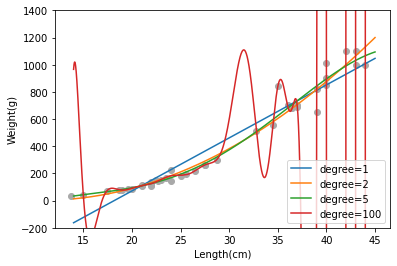

In [170]:
# LinearRegression 객체 생성
reg=LinearRegression()
# 함수 호출 
visuallize_regression(reg,X_train,y_train)

## `l2` 규제(RIdge regularization)

degree=1,W=[332.63395699]
degree=2,W=[ 90.58971122 249.48800198]
degree=5,W=[71.46390274 95.36902828 90.24481144 64.15690222 24.69095831]
degree=100,W=[ 5.68458773e+01  7.11425789e+01  7.19548031e+01  6.42812775e+01
  5.23489678e+01  3.91902142e+01  2.67131342e+01  1.59431315e+01
  7.28932355e+00  7.73385834e-01 -3.79884638e+00 -6.72086082e+00
 -8.31296552e+00 -8.88121060e+00 -8.69698510e+00 -7.98930587e+00
 -6.94436388e+00 -5.70885132e+00 -4.39495875e+00 -3.08582633e+00
 -1.84079404e+00 -7.00133384e-01  3.10859884e-01  1.17842459e+00
  1.89750069e+00  2.46943497e+00  2.90014981e+00  3.19870069e+00
  3.37615470e+00  3.44473059e+00  3.41714966e+00  3.30615492e+00
  3.12416328e+00  2.88302224e+00  2.59384748e+00  2.26692283e+00
  1.91164759e+00  1.53651914e+00  1.14914171e+00  7.56253695e-01
  3.63767984e-01 -2.31792990e-02 -4.00174914e-01 -7.63472115e-01
 -1.10993364e+00 -1.43697553e+00 -1.74251269e+00 -2.02490700e+00
 -2.28291835e+00 -2.51565892e+00 -2.72255076e+00 -2.90328676e+00
 -3.

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


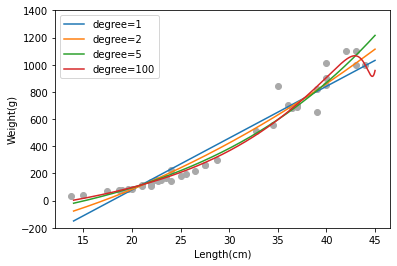

In [171]:
reg=Ridge()
visuallize_regression(reg,X_train,y_train)

Ridge 규제의 효과는 고차항들의 계수(coefficients, 기울기)를 작게 만들어서 곡선의 기울기를 완만하게 만들어 주게 됨.  

## `l1` 규제(Lasso Regularization)

degree=1,W=[339.55381311]
degree=2,W=[-37.56688954 381.72140363]
degree=5,W=[  0.         169.86798493 175.39652371   0.          -0.        ]
degree=100,W=[  0.          63.2765925  268.72581206  29.02636369   0.
   0.           0.           0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -6.77634564
  -6.07574687  -5.17017489  -4.29993019  -3.4658082   -2.66828008
  -1.90753532  -1.18352019  -0.49597256  -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 761.342244306521, tolerance: 518.2793833333334
  positive)


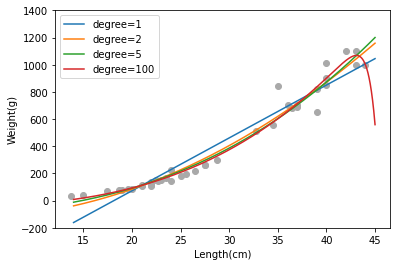

In [172]:
reg=Lasso()
visuallize_regression(reg,X_train,y_train)

Lasso 규제는 중요하지 않은 고차항들의 계수를 0으로 만들어 줌으로써, 곡선을 완만하게 만들어 주는 효과가 생김. 과대적합을 줄여주는 효과. 

## ElasticNet

degree=1,W=[226.70254207]
degree=2,W=[132.58403091 142.14452539]
degree=5,W=[65.81871932 66.12553502 64.44511229 61.45264451 57.66069996]
degree=100,W=[ 5.37266781e+01  5.02547097e+01  4.56276297e+01  4.04950707e+01
  3.52929284e+01  3.02982404e+01  2.56736771e+01  2.15003478e+01
  1.78033024e+01  1.45715607e+01  1.17731829e+01  9.36589058e+00
  7.30403328e+00  5.54281382e+00  4.04060776e+00  2.76004271e+00
  1.66831789e+00  7.37088409e-01  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -2.27791529e-01 -5.90474953e-01
 -9.00842714e-01 -1.16612354e+00 -1.39237937e+00 -1.58470077e+00
 -1.74737049e+00 -1.88399987e+00 -1.99764224e+00 -2.09088710e+00
 -2.16593838e+00 -2.22467956e+00 -2.26872791e+00 -2.29947991e+00
 -2.31814926e+00 -2.32579877e+00 -2.32336730e+00 -2.31169228e+00
 -2.29152875e+00 -2.26356518e+00 -2.22843668e+00 -2.18673587e+00
 -2.13902157e+00 -2.08582576e+00 -2.02765877e+00 -1.96501303e+00
 -1.89836548e+00 -1.82817884e+00 -1.75490190e+00 -1.67896900e+00
 -1.

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


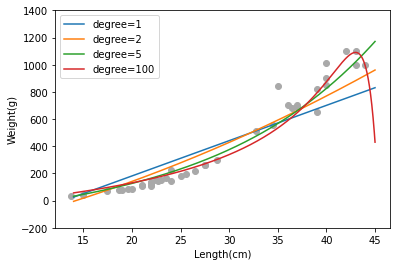

In [173]:
visuallize_regression(ElasticNet(),X_train,y_train)

ElasticNet은 Ridge 규제와 Lasso 규제의 효과를 모두 가지고있음.

* 머신 러닝의 목적은 목적 함수(objective function)/비용 함수(cost function)/손실 함수(loss function)을 최소화하는 것.
* 선형 회귀(linear regression)의 목적은 MSE(mean_squared_error)를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것. 즉, 선형 회귀의 목적 함수는 MSE(w).$$
J(w) = MSE(w) 
   = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2 
   = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - (w_0 + \sum_{j=1}^{m} w_{j} \cdot x_{ij}))^2
$$

  * N: 샘플의 개수(DataFrame의 row의 개수)
  * m: 특성의 개수(DataFrame의 column의 개수)
  * $y_i$: i번째 샘플의 실젯값
  * $\hat{y_i}$: i번째 샘플의 예측값
  * $x_{ij}$: i번째 샘플의 j번째 특성 값
  * $w_j$: j번째 특성에 곱해주는 계수(기울기)
* Ridge(l2) 규제의 목적은 아래의 비용 함수를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것.

$$
J(w) = MSE(w) + \dfrac{\alpha}{2} \mid\mid w \mid\mid ^2
$$
* Lasso(l1) 규제의 목적은 아래의 비용 함수를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것.
$$
J(w) = MSE(w) + \alpha \mid\mid w \mid\mid
$$
* ElasticNet 규제의 목적은 아래의 비용 함수를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것.
$$
J(w) = MSE(w) + r \alpha \mid\mid w \mid\mid 
              + \dfrac{1 - r}{2} \alpha \mid\mid w \mid\mid ^2
$$
* Ridge, Lasso에서 $\alpha$ 값이 크면 규제가 강해지고, $\alpha$ 값이 작으면 규제가 약해짐.
ElasticNet에서 $\alpha$는 규제의 크기를 의미하고, $r$은 l1 규제의 비율($0 \le r \lt 1$)을 의미함.

# 규제 크기($ \alpha $) 에 따른 선형 회귀 점수(결정 계수)

In [194]:
def visualize_r2_score(estimator,X_train,y_train,X_test,y_test):
  train_scores=[] # alpha 값을 변화시키면서 계산한 훈련 셋의 결정 계수를 저장할 리스트 
  test_scores=[] # alpha 값을 변화시키면서 계산한 테스트 셋의 결정 계수를 저장할 리스트
  alphas= [10**x for x in range(-3,3)]  # alphas=[0.001,0.01,0.1,1,10] 

  for a in alphas:  # 서로 다른 alpha들을 반복하면서 
      # 머신 러닝 모델 생성
      poly=PolynomialFeatures(degree=5,include_bias=False)
      scaler=StandardScaler()
      if estimator == 'ridge':
        reg=Ridge(alpha=a)
      elif estimator== 'lasso':
        reg=Lasso(alpha=a)
      elif estimator=='elastic':
        reg=ElasticNet(alpha=a)
      else:
        raise ValueError('estimator는 "ridge","lasso","elastic"이어야함!')

      model= Pipeline(steps=[('poly',poly),
                             ('scaler',scaler),
                             ('reg',reg)])
      
      # 머신 러닝 모델 학습시킴. 
      model.fit(X_train,y_train)
      # 훈련 셋 평가 점수(결정 계수) 계산하고 리스트에 추가
      train_pred=model.predict(X_train)
      train_r2=r2_score(y_train,train_pred)
      train_scores.append(train_r2)
      # 테스트 셋 평가 점수 (결정 계수)를 계산하고 리스트에 추가
      test_pred=model.predict(X_test)
      test_r2=r2_score(y_test,test_pred)
      test_scores.append(test_r2)

  print('train scores',train_scores)
  print('test scores',test_scores)
    # 시각화
  plt.plot(np.log10(alphas),train_scores,'bo-',label='Train score')
  plt.plot(np.log10(alphas),test_scores,'ro:',label='Test score')
  plt.legend()
  plt.show()

train scores [0.9736543234476451, 0.9733770960543661, 0.9708464608091912, 0.9675257933461249, 0.9641329386626264, 0.8627487881080745]
test scores [0.9798046964920933, 0.9789530910605557, 0.9764445172290546, 0.9665833996552662, 0.973317754557548, 0.8976726580323618]


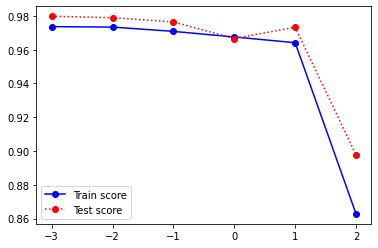

In [191]:
visualize_r2_score('ridge',X_train,y_train,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68371.36027450048, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60897.25696900669, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19450.81478042998, tolerance: 518.2793833333334
  positive)


train scores [0.9732647559337357, 0.9732456220772678, 0.9728858940077052, 0.9692636157789123, 0.9684606645363231, 0.8880500221451817]
test scores [0.9756595783526614, 0.9759957561350032, 0.9787105890743735, 0.9718691066691287, 0.97500542785893, 0.917866091243881]


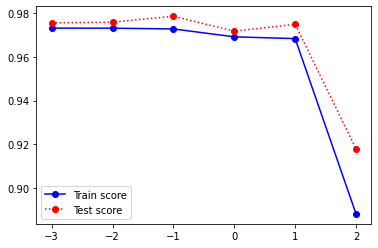

In [195]:
visualize_r2_score('lasso',X_train,y_train,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73193.66132866153, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 868.8427452529431, tolerance: 518.2793833333334
  positive)


train scores [0.9729318909719307, 0.9694267645740603, 0.9669667595405638, 0.9574099753809557, 0.7128959260018337, 0.1419437414816156]
test scores [0.9792791927855977, 0.9717021238527076, 0.9675102498277163, 0.9741613969257316, 0.7439362036454651, 0.10755935075190703]


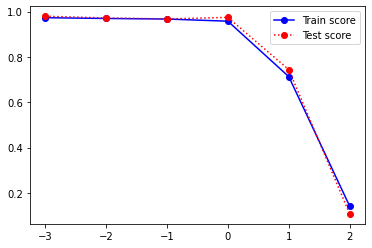

In [198]:
visualize_r2_score('elastic',X_train,y_train,X_test,y_test)

## 농어(Perch)의 모든 특성(Length,Diagonal,Height,Width)을 사용하고,$\alpha$값을 변화 시키면서 Ridge,Lasso,ElasticNet 을 비교